# Customer Churn Prediction using Python
This notebook analyzes a telecom churn dataset and builds a logistic regression model to predict churn.

# Step 1: Load & Explore Data

In [50]:
import pandas as pd

# Load dataset
df = pd.read_csv('Customer_Churn_Data.csv')

# Preview data
df.head()

,CustomerID,Gender,SeniorCitizen,Tenure,MonthlyCharges,Churn
0,CUST-1000,Female,1,11,38.66,No
1,CUST-1001,Male,0,64,66.00,Yes
2,CUST-1002,Female,0,21,142.51,Yes
3,CUST-1003,Female,0,98,26.95,Yes
4,CUST-1004,Female,0,1,145.96,No


# Step 2: Check Structure

In [51]:
df.info()
df.describe()
df['Churn'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      2001 non-null   object 
 1   Gender          2001 non-null   object 
 2   SeniorCitizen   2001 non-null   int64  
 3   Tenure          2001 non-null   int64  
 4   MonthlyCharges  2001 non-null   float64
 5   Churn           2001 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 93.9+ KB


Churn
Yes    1009
No      992
Name: count, dtype: int64

# Step 3: Visualize Churn Patterns

<Axes: title={'center': 'Churn Count'}, xlabel='Churn', ylabel='count'>

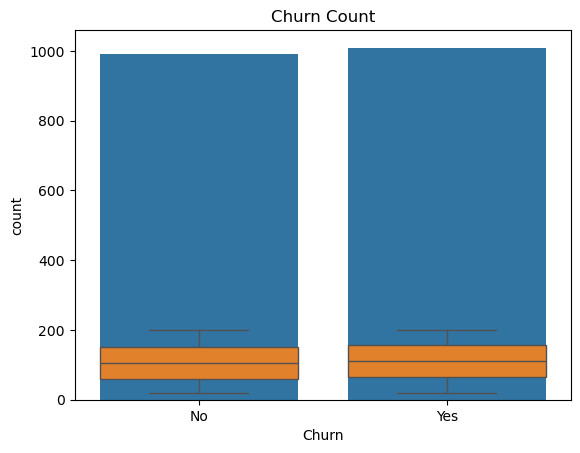

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Count')

# Monthly Charges by Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')

# Step 4: Preprocess Data

In [53]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Step 5: Train Model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
# Features and target
X = df[['Gender', 'SeniorCitizen', 'Tenure', 'MonthlyCharges']]
y = df['Churn']

In [56]:
# Drop m issing values
df = df.dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
# Predictions
y_pred = model.predict(X_test)

In [59]:
# Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.5211970074812967
Confusion Matrix: [[ 87 119]
 [ 73 122]]


# Model Evaluation

In [60]:
from sklearn.metrics import classification_report

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

✅ Accuracy: 0.5211970074812967


In [61]:
# Confusion Matrix
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📉 Confusion Matrix:
 [[ 87 119]
 [ 73 122]]


In [62]:
# Classification Report
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


📋 Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.42      0.48       206
           1       0.51      0.63      0.56       195

    accuracy                           0.52       401
   macro avg       0.52      0.52      0.52       401
weighted avg       0.53      0.52      0.52       401

